Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 07: Fourier Transform

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, January 11, 2022**. Therefore, the sheet is a bit longer and you can get a total of 26 points. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

**HINT: There is a bonus exercise in the end. If you do this bonus exercise you may leave out one of the other exercises.**

## Assignment 0: Math recap (Expectation and Variance) [0 Points] 

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is the relation between mean and expectated value? How to compute it?

The expected value is the weighted average value that a random variable may take. In the case of a real-valued random variable $X$ with distribution $P_X$, over some (potentially infinite) domain $\Omega$, it is defined by
$$ E[X] := \int_{\omega\in\Omega} X dP_X(\omega) $$
In a statsitical setting, when a finite dataset $D$ is considered, the average is called the *mean*, i.e.
$$\mu := \frac{1}{|D|}\sum_{x\in D} x$$
Under suitable conditions, the mean will converge towards the expected value for large data samples.

**b)** What is the variance? What does it express? Why is there a square in the formula?

The variance measures the expected deviation of a random variable/data from the expected value/mean. It is normally formulated using the euclidean distance, hence the square (but other approaches are possible, though rare):
$$Var(X) = E[(X-E[X])^2]$$

**c)** Can you compute mean and variance of a given 1-dimensional dataset (e.g., $D=\{9,10,11,7,13\}$). Can you do the same for a 3-dimensional dataset (e.g., D=\{(1,10,9), (1,10,10), (10,10,11), (19,10,7), (19,10,13)\})?

In [1]:
import numpy as np
D = np.asarray([9, 10, 11, 7, 13])
mean = D.sum() / len(D)
variance = ((D - mean)**2).sum() / len(D)
print("mean: {} (built-in: {})".format(mean, D.mean()))
print("variance: {} (built-in: {})".format(variance, D.var()))

mean: 10.0 (built-in: 10.0)
variance: 4.0 (built-in: 4.0)


## Exercise 1: Understanding Fourier Transform [7 points]

This exercise aims at getting some intuition of finite, 2d-Fourier transform.

*Hint:* Python and numpy can deal with complex numbers: `np.real()` and `np.imag()` provide the real and imaginary parts. `np.abs()` and `np.angle()` provide amplitude and phase. `np.conj()` gives the complex conjugate.

**a)** Transform the image `dolly.png` into the frequency space (you may use the function
`numpy.fft.fft2`). The result will be a complex matrix. Plot histograms for the amplitude and phase
values. You may take the logarithm of the amplitude to enhance contrast.

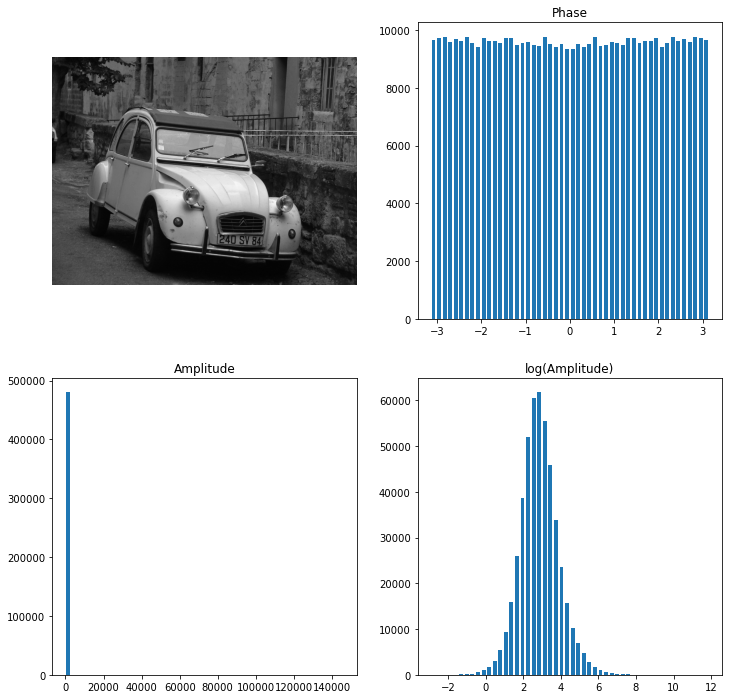

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')


# BEGIN SOLUTION
def histogram(x):
    """Computes and plots histogram of image
    
    Args:
        x (ndarray): Input image.
        
    Returns:
    
    """
    
    hist, bins = np.histogram(x, bins=50)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center', width=width)


# Perform (fast) Fourier transform.
ft = np.fft.fft2(img)

# Get amplitude and phase.
amplitude = np.abs(ft)
phase = np.angle(ft)

plt.figure(figsize=(12, 12))

plt.gray()
plt.subplot(2, 2, 1)
plt.axis('off')
plt.imshow(img)
# Plot histograms.
plt.subplot(2, 2, 3)
histogram(amplitude)
plt.title('Amplitude')
plt.subplot(2, 2, 4)
histogram(np.log(amplitude))
plt.title('log(Amplitude)')
plt.subplot(2, 2, 2)
histogram(phase)
plt.title('Phase')
# END SOLUTION
plt.show()

**b)** Display the amplitude and phase in separate images. You may again take the logarithm of
the amplitude to enhance the contrast. You may also center the base frequency (see function `numpy.fft.fftshift`). Compare your results with CV-09, slide 33.

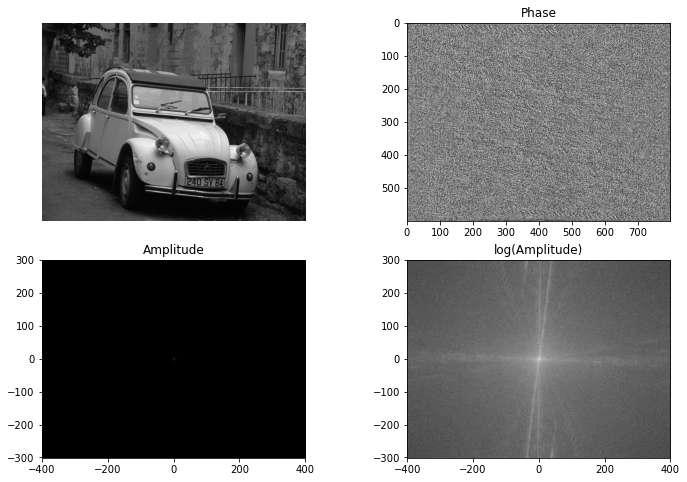

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# BEGIN SOLUTION
# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
#ft = np.fft.fftshift(ft)
amplitude = np.abs(ft)
phase = np.angle(ft)

plt.figure(figsize=(12, 8))

extent = [-(img.shape[1]+1)//2,img.shape[1]//2,
          -(img.shape[0]+1)//2,img.shape[0]//2]
plt.gray()
plt.subplot(2, 2, 1)
plt.axis('off')
plt.imshow(img)
plt.subplot(2, 2, 3)
plt.imshow(np.fft.fftshift(amplitude), extent=extent)
plt.title('Amplitude')
plt.subplot(2, 2, 4)
plt.imshow(np.log(np.fft.fftshift(amplitude)), extent=extent)
plt.title('log(Amplitude)')
plt.subplot(2, 2, 2)
plt.imshow(phase)
plt.title('Phase')
plt.show()
# END SOLUTION

**c)** Transform the image back from the frequency space to the image space (again using `fft2`).
What do you observe? Explain and repair the result.

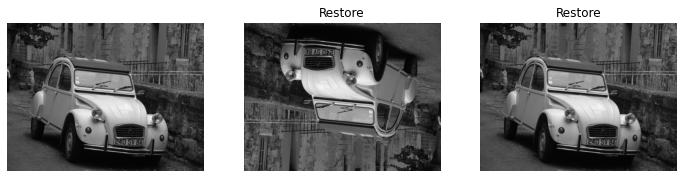

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# BEGIN SOLUTION

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

restore = np.abs(np.fft.fft2(ft))
restore2 = np.abs(np.fft.fft2(np.conj(ft)))

plt.figure(figsize=(12, 4))
plt.gray()
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(restore)
plt.title('Restore')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(restore2)
plt.title('Restore')
# END SOLUTION

plt.show()

Explanation.

**d)** Now restore the image, but only keep the amplitude and vary the phase. Try fixed phase
values (0, $\pi/2$,. . . ), a random phase matrix, or a noisy version of the original phase values.

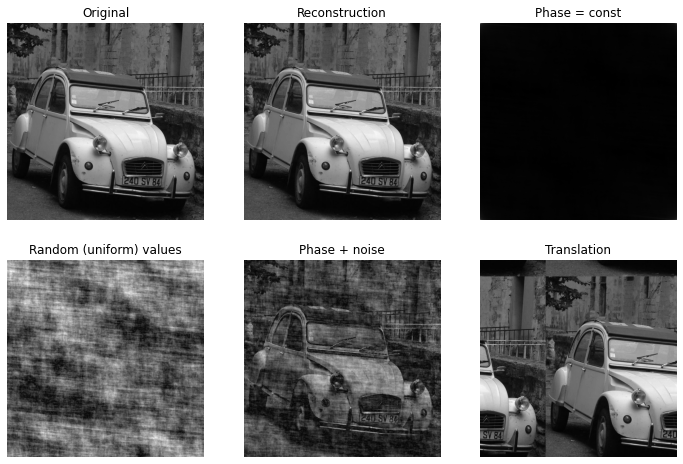

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dollySquared.jpg')

# BEGIN SOLUTION
# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

ft2 = amplitude * np.exp(1j * phase + 100)
ft3 = amplitude * np.exp(1j * np.pi/2)
ft4 = amplitude * np.exp(1j * np.random.rand(*phase.shape) * 2*np.pi)
ft5 = amplitude * np.exp(1j * phase + np.random.rand(*phase.shape) * 3.1)

dx = 200
dy = 50
ft6 = np.zeros_like(ft)
# Assumption: Image is square.
for (u, v), val in np.ndenumerate(ft):
        ft6[u, v] = val * np.exp(-1j * 2 * np.pi / ft.shape[0] * (u * dy + v * dx))

restore2 = np.abs(np.fft.ifft2(ft2))
restore3 = np.abs(np.fft.ifft2(ft3))
restore4 = np.abs(np.fft.ifft2(ft4))
restore5 = np.abs(np.fft.ifft2(ft5))
restore6 = np.abs(np.fft.ifft2(ft6))

plt.figure(figsize=(12, 8))
plt.gray()
plt.subplot(2, 3, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')
plt.subplot(2, 3, 2); plt.axis('off'); plt.imshow(restore2); plt.title('Reconstruction')
plt.subplot(2, 3, 3); plt.axis('off'); plt.imshow(restore3); plt.title('Phase = const')
plt.subplot(2, 3, 4); plt.axis('off'); plt.imshow(restore4); plt.title('Random (uniform) values')
plt.subplot(2, 3, 5); plt.axis('off'); plt.imshow(restore5); plt.title('Phase + noise')
plt.subplot(2, 3, 6); plt.axis('off'); plt.imshow(restore6); plt.title('Translation')
plt.show()
# END SOLUTION

**e)** We do the same, but now we keep the phase while varying the amplitude values, i.e. constant,
amplitude, randomly distributed amplitudes and noisy versions of the the original values.

Explain the results!


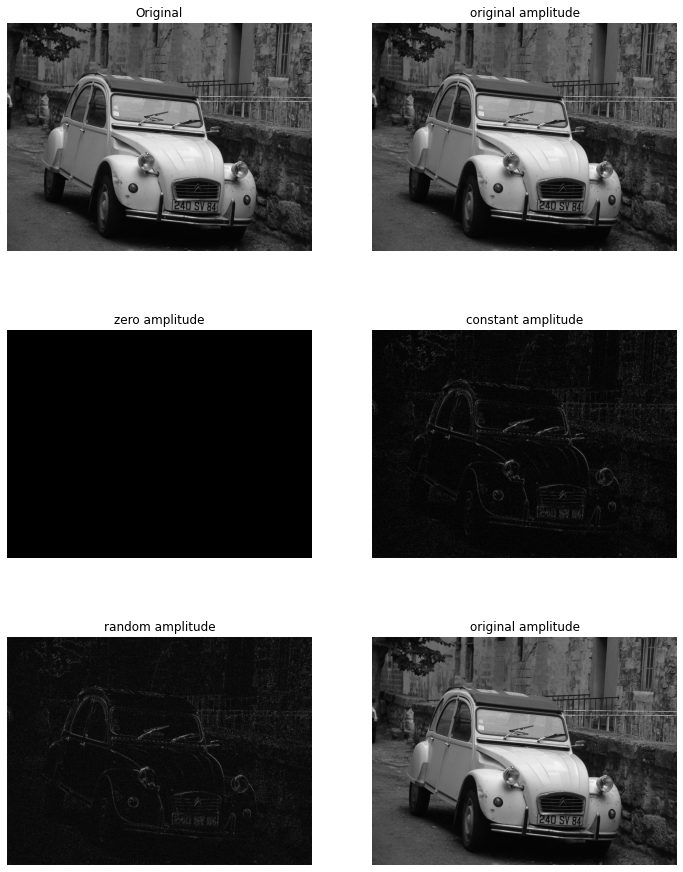

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('images/dolly.png')

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)

# Get amplitude and phase
amplitude = np.abs(ft)
phase = np.angle(ft)

amplitudes = []
amplitudes.append((amplitude, "original amplitude"))
amplitudes.append((np.zeros(amplitude.shape), "zero amplitude"))
amplitudes.append((np.ones(amplitude.shape)*amplitude.max(), "constant amplitude"))
amplitudes.append((np.random.rand(*amplitude.shape), "random amplitude"))
amplitudes.append((amplitude, "original amplitude"))

plt.figure(figsize=(12, 16)); plt.gray()
plt.subplot(3, 2, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')

for i, (amp, tit) in enumerate(amplitudes):
    ft0 = amp * np.exp(1j * phase)
    img0 = np.abs(np.fft.ifft2(ft0))
    plt.subplot(3, 2, 2+i); plt.axis('off'); plt.title(tit)
    plt.imshow(img0)

plt.show()

## Exercise 2: Implementing Fourier Transform [6 points]

**a)** 
Explain in your own words the idea of Fourier transform. What is the frequency space? What does a point in that space represent?

Fourier transform decomposes a function into frequencies. It can be considered as a (linear) transformation, mapping from the pixel space into the frequency space. The frequency space has a basis consisting of harmonics of different frequency. A point in the frequency corresponds to one such basis element (sine function).

**b)** First implement a one-dimensional discrete version of Fourier transform, i.e. use the formula
$$ c_n = \sum_{x=0}^{L-1} f(x)\cdot e^{-\tfrac{2\pi i\cdot n}{L}\cdot x} \qquad \text{for $n=0,\ldots,L-1$}$$
for complex valued coefficients.

Plot the graph and the results of your Fourier transform, using the Matplotlib function `plot()`, for different functions. Compare your results with the output of the function `numpy.fft.fft`.

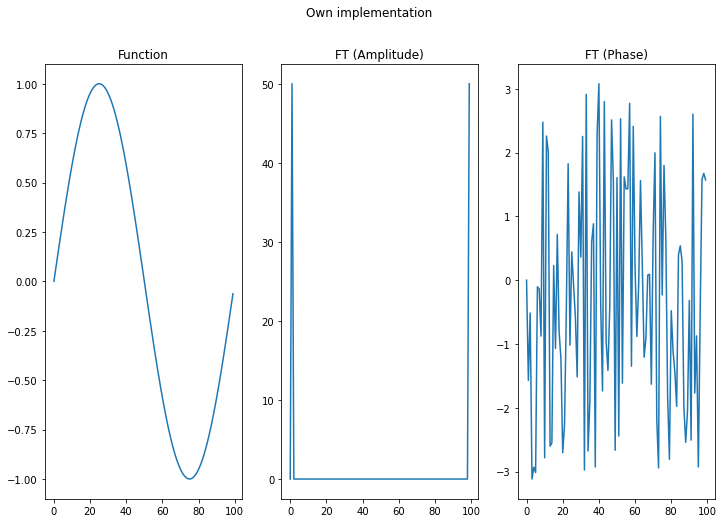

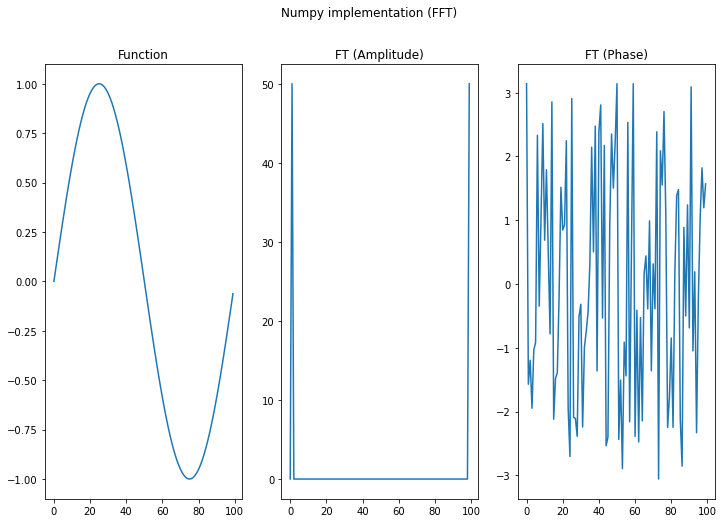

In [7]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt


def fourier1d(func):
    """
    Perform a discrete 1D Fourier transform.
    
    Args:
        func (ndarray): 1-D array containing the function values.
    
    Returns:
        ndarray (complex): The Fourier transformed function.
    """
    ft = np.zeros(func.shape, dtype=complex)

    # BEGIN SOLUTION
    L = func.size
    n = np.arange(L)
    k = n[:, None] # Reshape to column vector.
    M = np.exp(-2j * np.pi * k * n / L)
    ft = M @ func
    # END SOLUTION

    return ft


# number of points
L = np.arange(100)


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))


func = np.sin(2 * np.pi * L / len(L))
#func = np.zeros(L.shape)
#func[40:60] = 1
#func = gaussian(L, 0, 10)

# Own implementation.
ft = fourier1d(func)
plt.figure(figsize=(12, 8))
plt.suptitle('Own implementation');
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

# Numpy implementation.
ft = np.fft.fft(func)

plt.figure(figsize=(12, 8))
plt.suptitle('Numpy implementation (FFT)')
plt.subplot(1, 3, 1); plt.plot(L, func); plt.title('Function')
plt.subplot(1, 3, 2); plt.plot(L, np.abs(ft)); plt.title('FT (Amplitude)')
plt.subplot(1, 3, 3); plt.plot(L, np.angle(ft)); plt.title('FT (Phase)')
plt.show()

**c)** Now implement a 2-dimensional version of Fourier transform for images, using the formula from the lecture. Compare your result with the output of `fft2`.

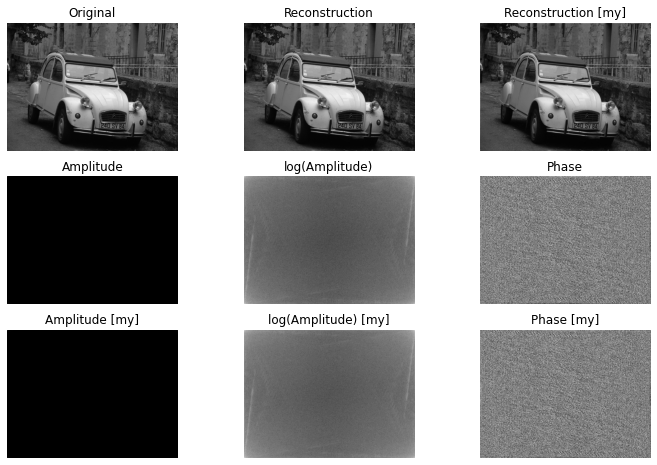

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


def fourier2d(img):
    """
    Perform discrete 2D Fourier transform of a given image.
    
    Args:
        img (ndarray): Input image.
        
    Returns:
    
    """

    ft = np.zeros(img.shape)

    # BEGIN SOLUTION

    M, N = img.shape

    # we first compute e^{-i 2pi (i/M)} for i=0,...,M-1 (and same for N)
    e_M = np.exp(np.linspace(0, -1j * 2 * np.pi, M))
    e_N = np.exp(np.linspace(0, -1j * 2 * np.pi, N))

    # now compute indices. Idea: e_M[idx_M] shall become a (M,M) matrix
    # with e^{-i 2pi (i/M + j/M)} at position [i,j]. (and same for N)
    idx_M = np.mod(np.arange(M).reshape((M, 1)) @ np.arange(M).reshape((1, M)), M)
    idx_N = np.mod(np.arange(N).reshape((N, 1)) @ np.arange(N).reshape((1, N)), N)
    # Now use separability: first do a vertical transform (tmp = e_M[idx_M]@ img)
    # and then a horizontal transform (ft = tmp @ e_N[idx_N])
    ft = e_M[idx_M] @ img @ e_N[idx_N]
    
    # END SOLUTION

    return ft


# Now (visually) compare your results with np.fft.fft2
img = plt.imread('images/dolly.png')

# BEGIN SOLUTION

# Perform (fast) Fourier transform
ft = np.fft.fft2(img)
amplitude = np.abs(ft)
phase = np.angle(ft)
restore = np.abs(np.fft.fft2(np.conj(ft)))

my_ft = fourier2d(img)
my_amplitude = np.abs(my_ft)
my_phase = np.angle(my_ft)
my_restore = np.abs(fourier2d(np.conj(my_ft)))

ft_phase = np.cos(phase) + 1j * np.sin(phase)
img_phase = abs(np.fft.fft2(ft_phase))

plt.figure(figsize=(12, 8))

plt.gray()
plt.subplot(3, 3, 1); plt.axis('off'); plt.imshow(img); plt.title('Original')
plt.subplot(3, 3, 2); plt.axis('off'); plt.imshow(restore); plt.title('Reconstruction')
plt.subplot(3, 3, 3); plt.axis('off'); plt.imshow(my_restore); plt.title('Reconstruction [my]')

plt.subplot(3, 3, 4); plt.axis('off'); plt.imshow(amplitude); plt.title('Amplitude')
plt.subplot(3, 3, 5); plt.axis('off'); plt.imshow(np.log(amplitude)); plt.title('log(Amplitude)')
plt.subplot(3, 3, 6); plt.axis('off'); plt.imshow(phase); plt.title('Phase')

plt.subplot(3, 3, 7); plt.axis('off'); plt.imshow(my_amplitude); plt.title('Amplitude [my]')
plt.subplot(3, 3, 8); plt.axis('off'); plt.imshow(np.log(my_amplitude)); plt.title('log(Amplitude) [my]')
plt.subplot(3, 3, 9); plt.axis('off'); plt.imshow(my_phase); plt.title('Phase [my]')

# END SOLUTION

plt.show()

## Exercise 3: Convolution theorem [7 points]

**a)** What does the convolution theorem state and what are its practical consequences?

Convolution in pixel space is just a complex multiplication in fourier space. This can dramatically reduce the runtime of convolution, especially when applying multiple filters.

**b)**
When introducing convolution, we have discussed different methods to deal with boundary pixels. From the perspective of Fourier analysis, what is the natural way to deal with this problem?

Periodically expand the image.

**c)** What is the complexity for computing a convolution using the convolution theorem? Compare this with your complexity results from sheet 01, Assignment 1(c).


For a $N \times N$ image complexity using convolution theorem is

$$O(N^2\log_2 N)$$

composed of the complexety of transformation into and out of frequency domain ($O(N^2\log_2 N)$) and the complexity of the multiplication ($O(N^2)$).

Convolution in the spacial domain has the complexity of

$$O(n^2 \cdot N^2)$$

for a $(n \times n)$ kernel. ($O(n^2)$ per pixel for each of the $N^2$ pixels.)

**d)** Proof the convolution theorem.

For the proof we will make two assumptions:
1. The kernel $h$ has the same size as the image $f$: $M\times N$. We can always achieve this by simply filling all positions outside the "real" kernel with zeros. This will not affect the outcome of the convolution operation.
1. The image $f$ is periodically continued, i.e., $f(x,y) = f(x+i\cdot M,y+j\cdot N)$ for all $i,j\in\mathbb{Z}$. Same for the kernel. This allows to index the kernel with indices from $\{0,\ldots,M-1\}\times\{0,\ldots,N-1\}$.

With these assumptions, we can compute the convolution operation as
$$(f\ast h)(x,y) = \sum_{i=0}^{M-1}\sum_{j=0}^{N-1} f(x-i,y-j)\cdot h(i,j)$$
Notice, that we use the "original" version of convolution, with a flipped kernel (otherwise the convolution theorem would insert a minus sign, check below!)

Now we can simply spell out the definitions:
\begin{align*}
\mathcal{F}[f\ast h](u,v)
&= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}[f\ast h](x,y)\cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})} \\
&= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}\left[\sum_{i=0}^{M-1}\sum_{j=0}^{N-1}f(x-i,y-j)\cdot h(i,j)\right]\cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})} \\
&= \sum_{x=0}^{M-1}\sum_{y=0}^{N-1}\sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\left[
f(x-i,y-j)\cdot h(i,j) \cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})}\right] \\
&= \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}\left[
f(x-i,y-j)\cdot h(i,j) \cdot e^{-\operatorname{i}2\pi(u\frac{x}{M}+v\frac{y}{N})}\right] \\
\end{align*}
Now substitue $x\mapsto x'+i$ and $y\mapsto y'+j$:
\begin{align*}
\qquad\qquad\qquad\qquad\ldots
&= \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\sum_{x'=-i}^{M-i-1}\sum_{y'=-j}^{N-j-1}\left[
f(x'+i-i,y'+j-j)\cdot h(i,j) \cdot e^{-\operatorname{i}2\pi(u\frac{x'+i}{M}+v\frac{y'+j}{N})}\right] \\
&= \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\sum_{x'=-i}^{M-i-1}\sum_{y'=-j}^{N-j-1}\left[
f(x',y')\cdot h(i,j) \cdot e^{-\operatorname{i}2\pi(u\frac{x'}{M}+v\frac{y'}{N})}
\cdot e^{-\operatorname{i}2\pi(u\frac{i}{M}+v\frac{j}{N})}\right] \\
&= \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\sum_{x'=-i}^{M-i-1}\sum_{y'=-j}^{N-j-1}\left[
f(x',y') \cdot e^{-\operatorname{i}2\pi(u\frac{x'}{M}+v\frac{y'}{N})} \cdot h(i,j)
\cdot e^{-\operatorname{i}2\pi(u\frac{i}{M}+v\frac{j}{N})}\right] \\
&= \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\left[\sum_{x'=-i}^{M-i-1}\sum_{y'=-j}^{N-j-1}\left[
f(x',y') \cdot e^{-\operatorname{i}2\pi(u\frac{x'}{M}+v\frac{y'}{N})} \right] \cdot h(i,j)
\cdot e^{-\operatorname{i}2\pi(u\frac{i}{M}+v\frac{j}{N})}\right] \\
\end{align*}
Because of the periodicity of $f(x',y') \cdot e^{-\operatorname{i}2\pi(u\frac{x'}{M}+v\frac{y'}{N})}$ we can shift the indices of the inner two sums:
\begin{align*}
\qquad\qquad\qquad\qquad\ldots
&= \sum_{i=0}^{M-1}\sum_{j=0}^{N-1}\left[\sum_{x'=0}^{M-1}\sum_{y'=0}^{N-1}\left[
f(x',y') \cdot e^{-\operatorname{i}2\pi(u\frac{x'}{M}+v\frac{y'}{N})} \right] \cdot h(i,j)
\cdot e^{-\operatorname{i}2\pi(u\frac{i}{M}+v\frac{j}{N})}\right] \\
&= \left[\sum_{x'=0}^{M-1}\sum_{y'=0}^{N-1}
f(x',y') \cdot e^{-\operatorname{i}2\pi(u\frac{x'}{M}+v\frac{y'}{N})}\right] \cdot
\left[\sum_{i=0}^{M-1}\sum_{j=0}^{N-1}h(i,j)
\cdot e^{-\operatorname{i}2\pi(u\frac{i}{M}+v\frac{j}{N})}\right] \\
&= \mathcal{F}[f](u,v)\cdot \mathcal{F}[h](u,v)
\end{align*}

## Exercise 4: Filter design and frequency space[6 points]

**a)** Create and plot the kernels of box filter and binomial filter in frequency space. Vary the the kernel size. What do you observe?

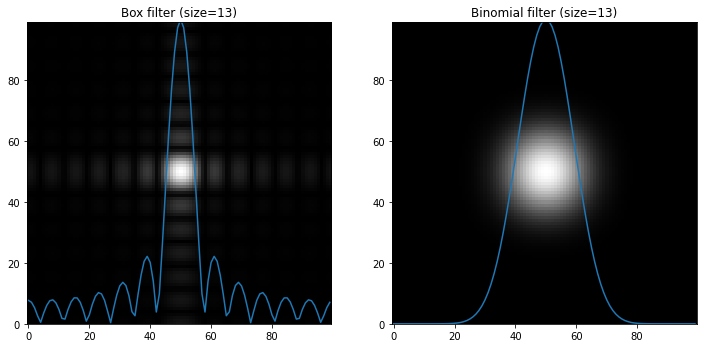

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

kernel_size = 13 # vary this
image_size = 100

# compute the kernel
box_kernel = np.zeros((image_size,image_size))
binomial_kernel = np.zeros((image_size,image_size))

### BEGIN SOLUTION
box_kernel[:kernel_size,:kernel_size] = 1/kernel_size**2

binom1 = binom(kernel_size-1,np.arange(kernel_size))
binomial_kernel[:kernel_size,:kernel_size] = np.outer(binom1, binom1)/binom1.sum()**2
### END SOLUTION

box_frequencies = np.fft.fftshift(np.fft.fft2(box_kernel))
binomial_frequencies = np.fft.fftshift(np.fft.fft2(binomial_kernel))

# plot kernel in frequency space
plt.figure(figsize=(12,6))
plt.gray()
plt.subplot(1,2,1)
plt.title(f"Box filter (size={kernel_size})")
plt.imshow(np.abs(box_frequencies))
plt.plot(np.arange(image_size), np.abs(box_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.subplot(1,2,2)
plt.title(f"Binomial filter (size={kernel_size})")
plt.imshow(np.abs(binomial_frequencies))
plt.plot(np.arange(image_size), np.abs(binomial_frequencies)[image_size//2]*image_size)
plt.ylim(0, image_size-1)
plt.show()

In frequency space one can observe the difference between box and binomial filter. While the binomial filter approximates a Gaussian filter for larger kernel sizes, filtering out more and more of the high frequencies, for the box filter the amplitude does not drop monotonously for higher frequencies, and furthermore depends on the direction. This explains why the box filter introduces artifacts.

**b)** Implement a low pass filter and apply it to the given image with different cut off frequencies $F_\max$. What do you observe? Explain that observation and discuss how to improve the result.

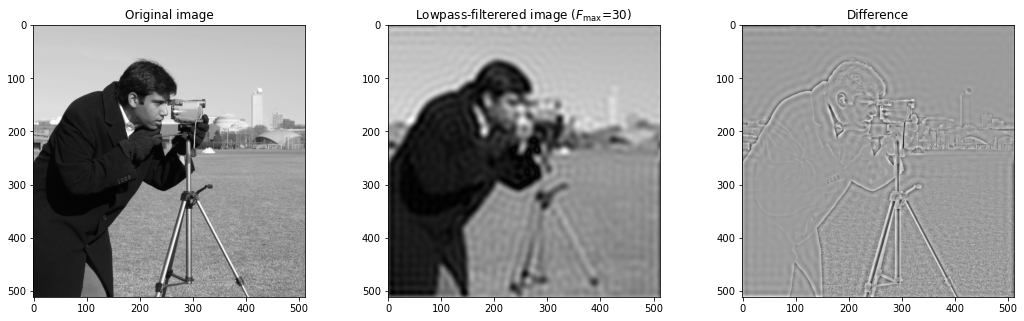

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

f_max = 30
image = imageio.imread('imageio:camera.png')

def low_pass_filter(image, f_max):
    result = image
    ### BEGIN SOLUTION
    frequencies = np.fft.fft2(image)
    
    xx, yy = np.mgrid[:image.shape[0],:image.shape[1]]
    xx = np.minimum(xx, xx[::-1,::-1])  # acount for symmetries
    yy = np.minimum(yy, yy[::-1,::-1])
    circle = xx ** 2 + yy ** 2
    filt = circle < f_max**2
    result = np.abs(np.fft.ifft2(frequencies * filt))
    ### END SOLUTION
    return result

filtered_image = low_pass_filter(image, f_max=f_max)

# plot kernel in frequency space
plt.figure(figsize=(18,5))
plt.gray()
plt.subplot(1,3,1); plt.title(f"Original image")
plt.imshow(image) 
plt.subplot(1,3,2); plt.title(f"Lowpass-filterered image ($F_\max$={f_max})")
plt.imshow(filtered_image)
plt.subplot(1,3,3); plt.title(f"Difference")
plt.imshow(filtered_image-image)
plt.show()

The resulting image shows ringing artifacts. These artifacts arise at edges and are due to the fact that edges in the image are visible throughout the whole spectrum. Using a hard frequency filter cuts away some of these frequencies, causing the artifacts. The artifacts can be avoided by a filter that does not delete high frequencies, but only weakens them.

**c)** What is a good kernel size for a Gaussian filter? Justify your answer.

The Gauss function will never be zero. Hence the kernel size should be choosen large enough, that its values are at least sufficiently small in the outer regions. One usually argues that this is the case at $3\sigma$, so the total kernel size is $2*[3\sigma]+1$.

The Fourier transform of a Gaussian kernel with standard deviation $\sigma$ is a Gauss function with standard deviation $1/\sigma$.

**d)** Describe impulse ("salt and pepper") noise and explain what kind of filter should be used to remove such noise.

Impulse noise sets isolated pixel in the image to either very high or very low values. A good filter to remove impulse noise is the median filter. Noisy pixels will be either at the very beginning or very end of the sorted pixel values and hence will never be in the filter output.

## Exercise 5: Applying Fourier Transform [Bonus]

If you solve this exercise you may leave out one of the other exercises.


**a)** In order to apply the Custom Structuring Element to our satelite image in Assignment 4 of Sheet 3 we had to rotate the image. We had to measure the rotation angle by hand. We can now do this automatically via Fourier Transform.

1. Apply Fourier transform to the `img_gray`. The resulting amplitude should show the angle of the black lines.

1. Try to automatically get the rotation angle from the Fourier space. There are different ways to achieve this.
   Hints:
   * You may threshold the amplitudes, to only keep “relevant” values. You can then compute the angle of the largest relevant value.
   * Alternatively, you may apply methods you know from other lectures to get the main component and compute its angle.

1. Rotate the image back to its originally intended orientation (`skimage.transform.rotate`).

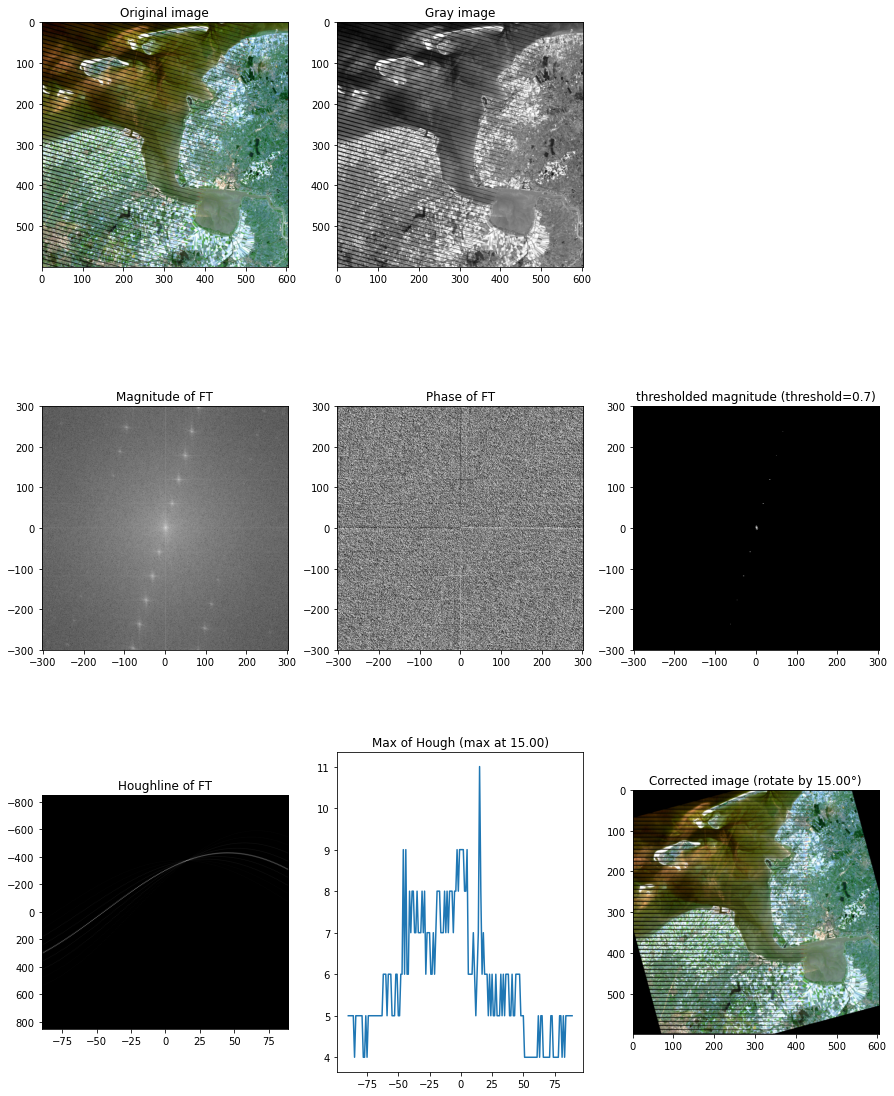

In [11]:
%matplotlib inline
import numpy as np
from skimage import color
from skimage.transform import hough_line
from skimage.transform import rotate
import matplotlib.pyplot as plt

img = plt.imread('images/landsat_stack2.png')
img_gray = color.rgb2gray(img)

# BEGIN SOLUTION
plt.figure(figsize=(15, 20))

plt.gray()
plt.subplot(3, 3, 1); plt.imshow(img); plt.title('Original image')

plt.subplot(3, 3, 2)
plt.imshow(img_gray)
plt.title('Gray image')

# Compute Fourier transform and display magnitude.
fft_img = np.fft.fftshift(np.fft.fft2(img_gray))
ampl = np.abs(fft_img)
mag = np.log(ampl)
extent = [-(img.shape[1]+1)//2,img.shape[1]//2,
          -(img.shape[0]+1)//2,img.shape[0]//2]
plt.subplot(3, 3, 4); plt.imshow(mag, extent=extent); plt.title('Magnitude of FT')
plt.subplot(3, 3, 5); plt.imshow(np.angle(fft_img), extent=extent); plt.title('Phase of FT')

# Compute threshold image.
threshold = 0.7
thresh_mag = (mag / mag.max()) > threshold
plt.subplot(3, 3, 6); plt.imshow(thresh_mag, extent=extent)
plt.title('thresholded magnitude (threshold={})'.format(threshold))

# Compute houghlines in fourier space.
acc_space, angles, d = hough_line(thresh_mag)
degs = np.rad2deg(angles)
plt.subplot(3, 3, 7)
plt.imshow(
    acc_space, extent=[degs[0], degs[-1], d[-1], d[0]], origin='lower', aspect=.1)
plt.title('Houghline of FT')

# get angle for maximal value
maxout = acc_space.max(axis=0)
argmax_out = maxout.argmax()
angle = degs[argmax_out]
plt.subplot(3, 3, 8)
plt.plot(degs, maxout)
plt.title('Max of Hough (max at {0:.2f})'.format(angle))

# Alternative method: find pixel with the largest X value in thresholded FT
X, Y = np.where(thresh_mag)
idx = X.argmax()
y = np.abs(Y[idx] - mag.shape[0] // 2)
x = np.abs(X[idx] - mag.shape[1] // 2)
angle2 = np.rad2deg(np.arctan2(y, x))
#angle = angle2

plt.subplot(3, 3, 9)
plt.imshow(rotate(img, angle))
plt.title('Corrected image (rotate by {0:.2f}°)'.format(angle))
# END SOLUTION

plt.show()

**b)** Can you think of other applications of Fourier Transform in Computer Vision?